In [1]:
from mnist import MNIST

mnist = MNIST('E:/dataset')
X, y = mnist.load_training()

In [2]:
import numpy as np

In [3]:
img=np.array(X)
lab=np.array(y)
print(img.shape)
print(lab.shape)

(60000, 784)
(60000,)


Preparing Classifier Training and Validation Data...
Random Forest Classifier with n_estimators = 100, n_jobs = 10
Calculating Accuracy of trained Classifier...
Making Predictions on Validation Data...
Calculating Accuracy of Predictions...
Creating Confusion Matrix...
RFC Trained Classifier Confidence:  0.9696666666666667
Predicted Values:  [6 7 9 ... 7 9 7]
Accuracy of Classifier on Validation Image Data:  0.9696666666666667
Confusion Matrix: 
 [[561   0   0   0   0   0   3   0   1   0]
 [  0 660   4   1   2   1   0   2   0   1]
 [  1   0 607   3   0   0   1   4   7   0]
 [  2   0   6 584   0   5   0   4   6   5]
 [  1   0   2   0 532   0   1   1   2   9]
 [  0   0   2   8   1 499   3   0   0   5]
 [  3   2   0   0   1   3 638   0   2   0]
 [  1   2   4   0   1   0   0 612   1   7]
 [  1   5   7   3   1   5   1   0 552   3]
 [  3   1   1   7  10   4   0   6   3 573]]


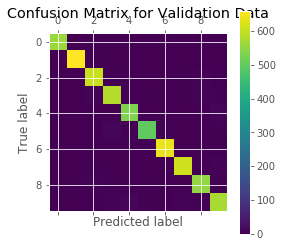

In [4]:
import sys
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#Features
X = img

#Labels
y = lab

print('Preparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

print('Random Forest Classifier with n_estimators = 100, n_jobs = 10')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

print('Calculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('Making Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('Calculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('Creating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('RFC Trained Classifier Confidence: ',confidence)
print('Predicted Values: ',y_pred)
print('Accuracy of Classifier on Validation Image Data: ',accuracy)
print('Confusion Matrix: \n',conf_mat)


# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


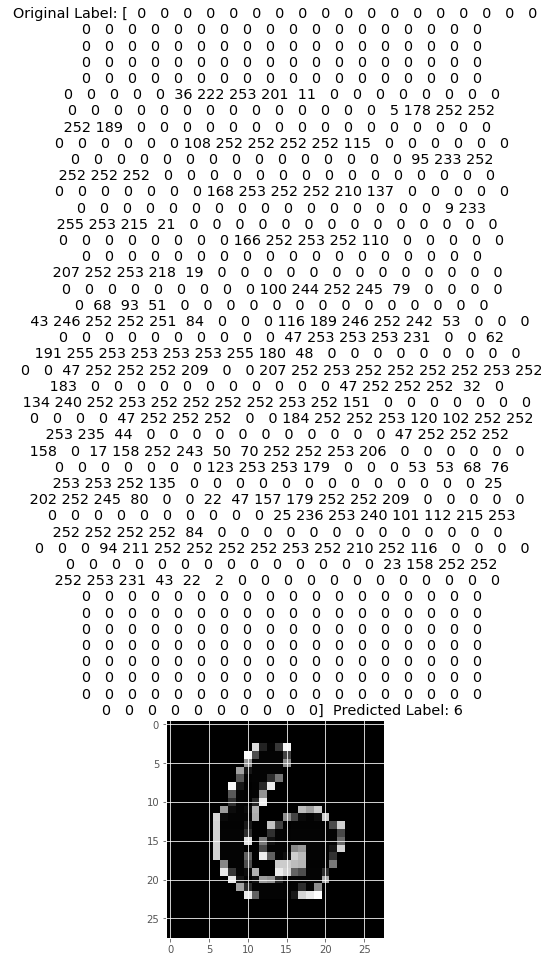

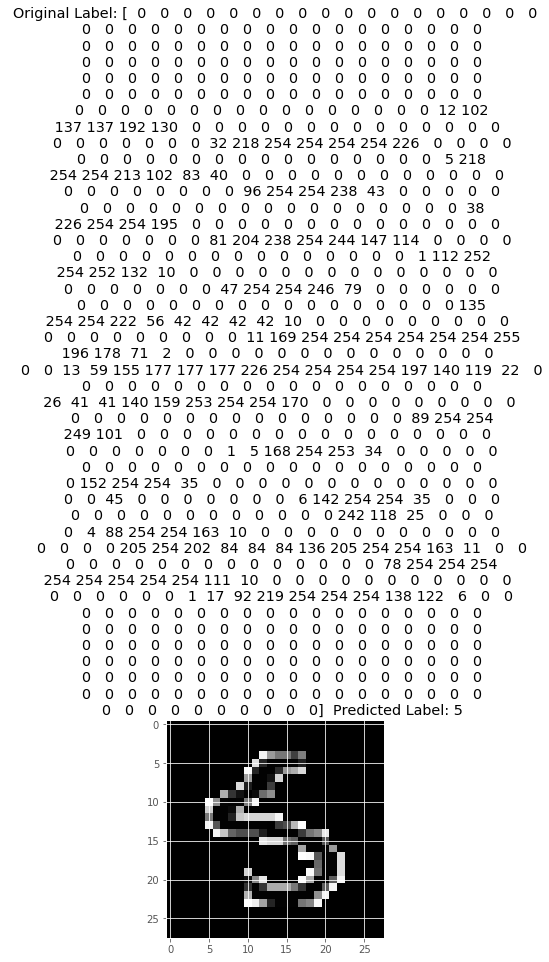

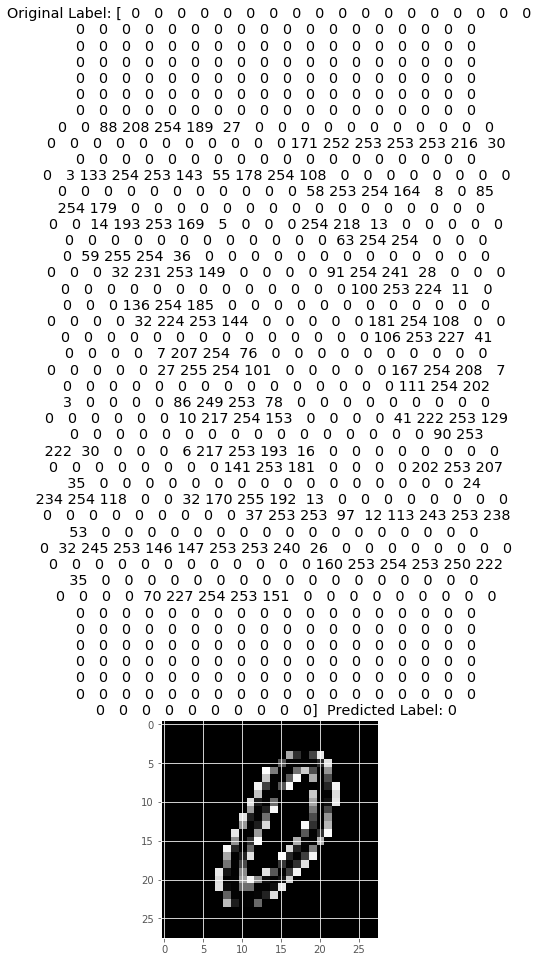

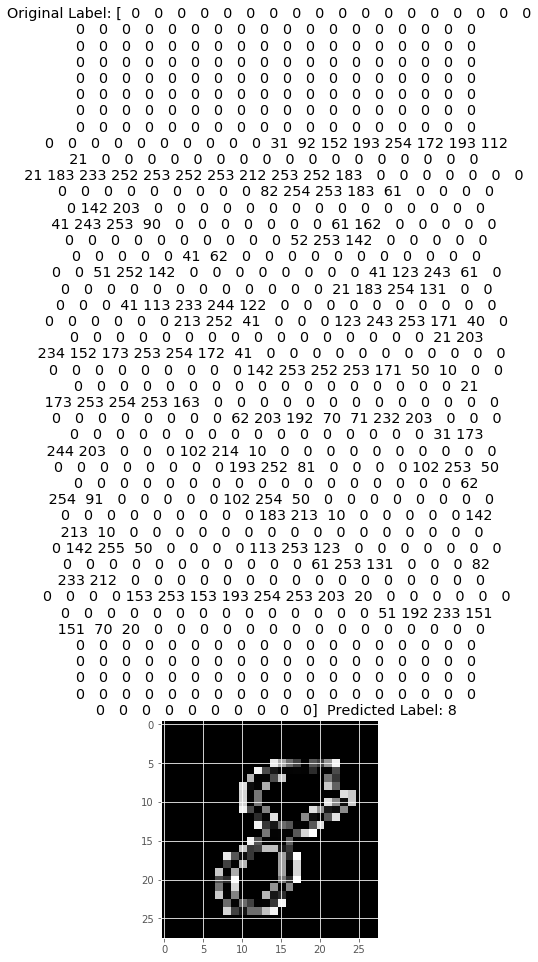

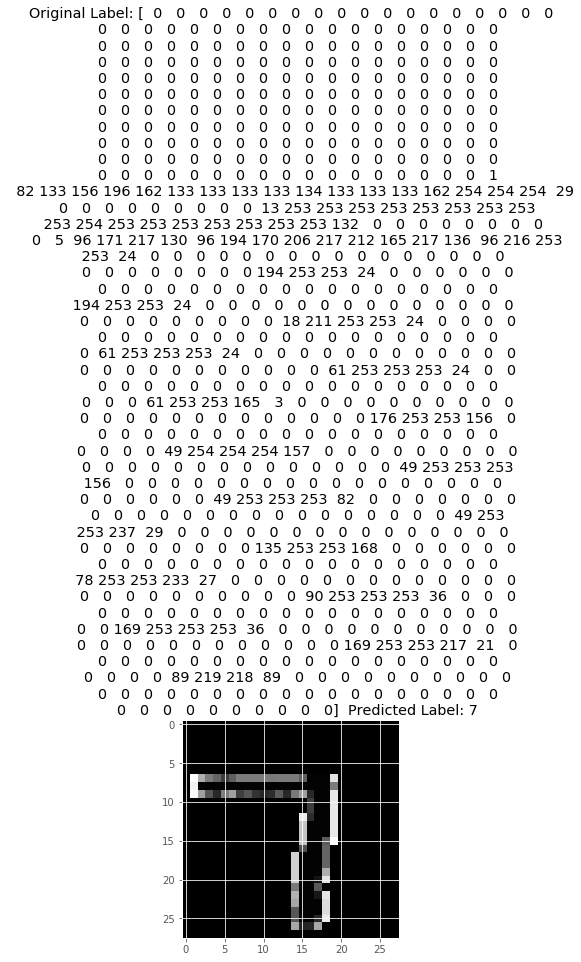

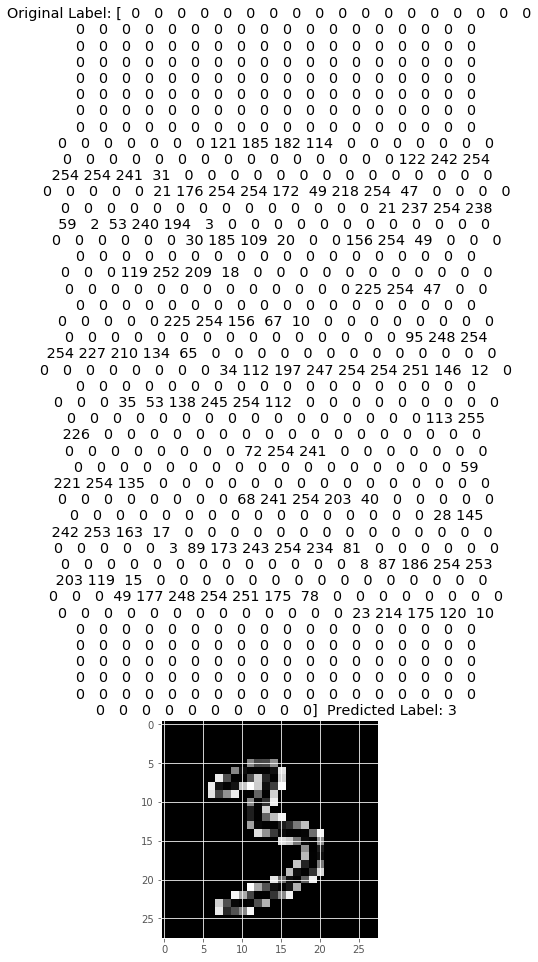

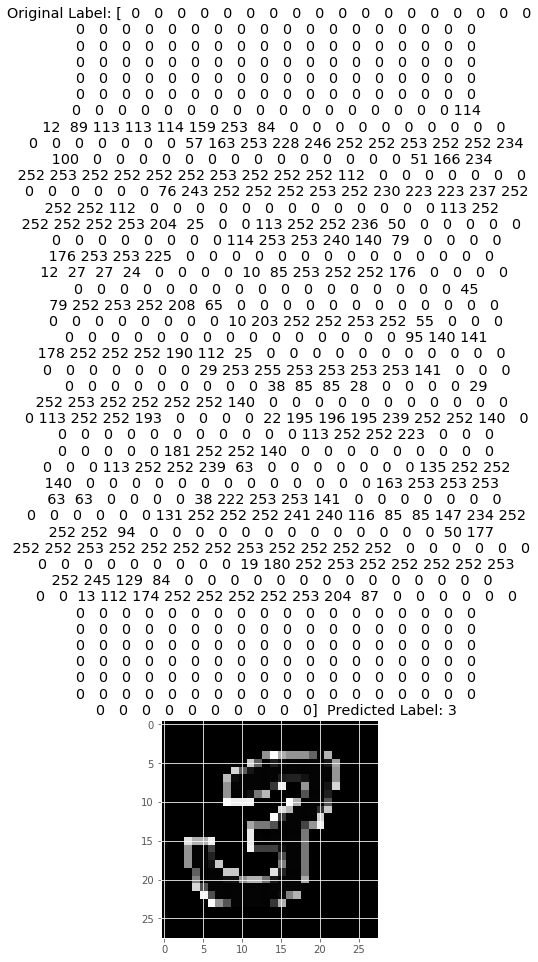

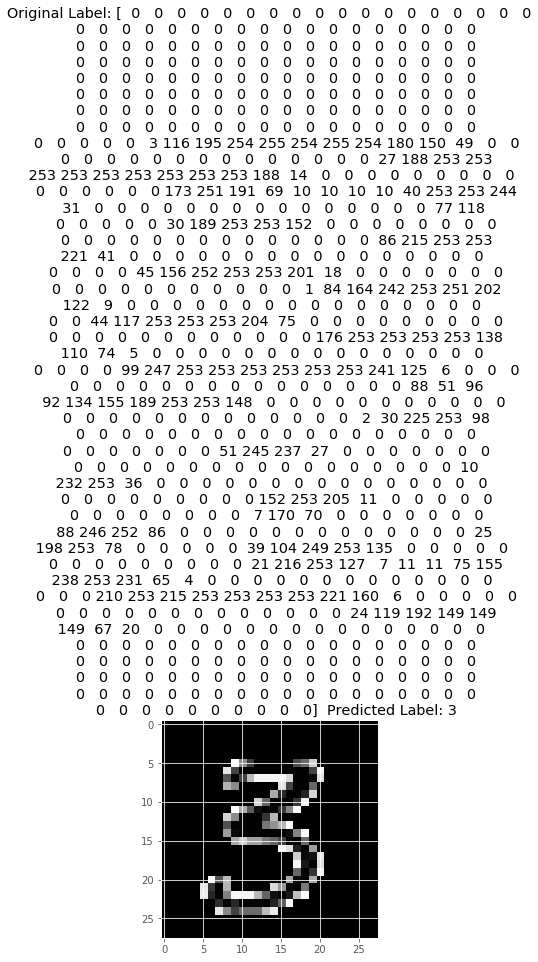

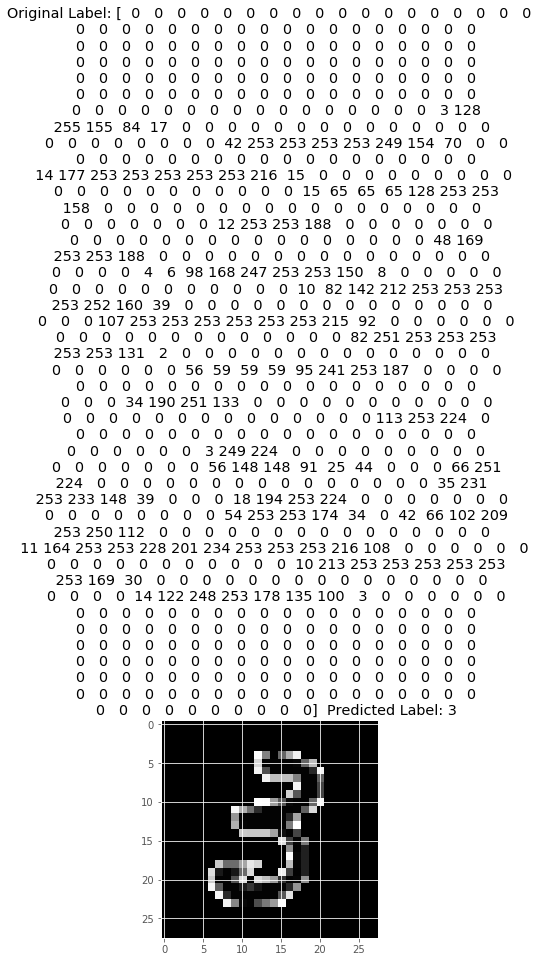

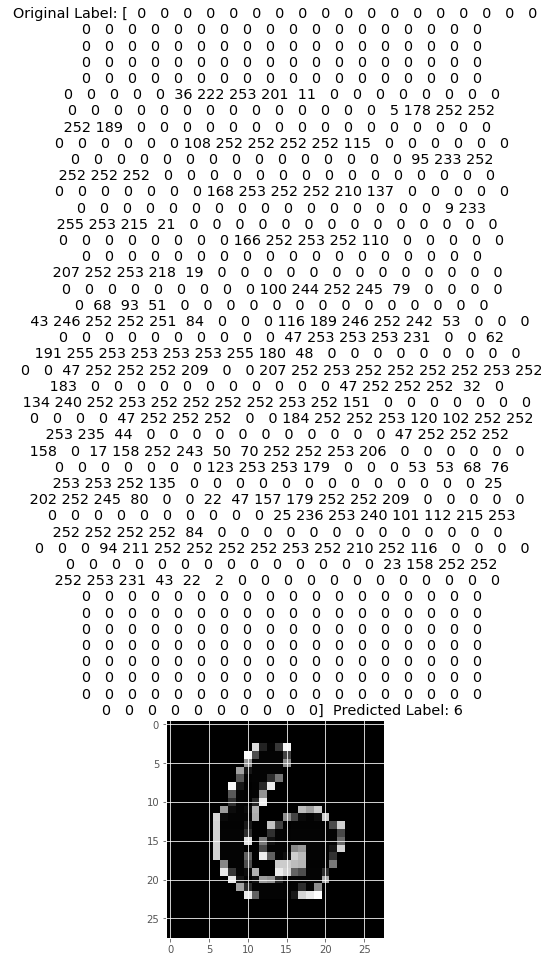

In [5]:
a = np.random.randint(1,30,10)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(X_test[i],y_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [23]:
test_img,test_lab=mnist.load_testing()
timg=np.array(test_img)
tlab=np.array(test_lab)

In [24]:
test_labels_pred=clf.predict(timg)
accuracy = accuracy_score(tlab, test_labels_pred)
print(accuracy)

0.9693


In [25]:
conf_mat = confusion_matrix(tlab, test_labels_pred)
print(conf_mat)

[[ 970    0    0    0    0    2    4    1    3    0]
 [   0 1124    2    3    0    1    3    0    1    1]
 [   6    0  997    3    3    1    5    8    9    0]
 [   0    0   11  969    0   10    0    9    7    4]
 [   1    0    1    0  953    0    5    0    4   18]
 [   2    0    0    8    4  863    8    2    4    1]
 [   8    3    0    0    4    4  936    0    3    0]
 [   2    3   18    3    0    0    0  988    4   10]
 [   4    0    4    6    3    8    2    5  932   10]
 [   7    4    2    9   11    4    1    4    6  961]]


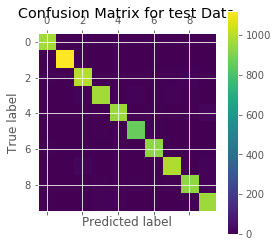

In [26]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

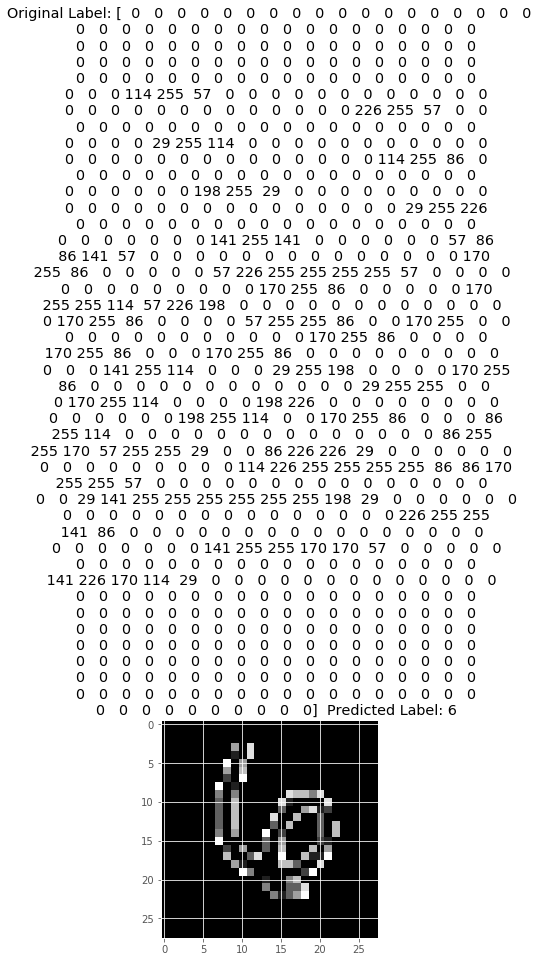

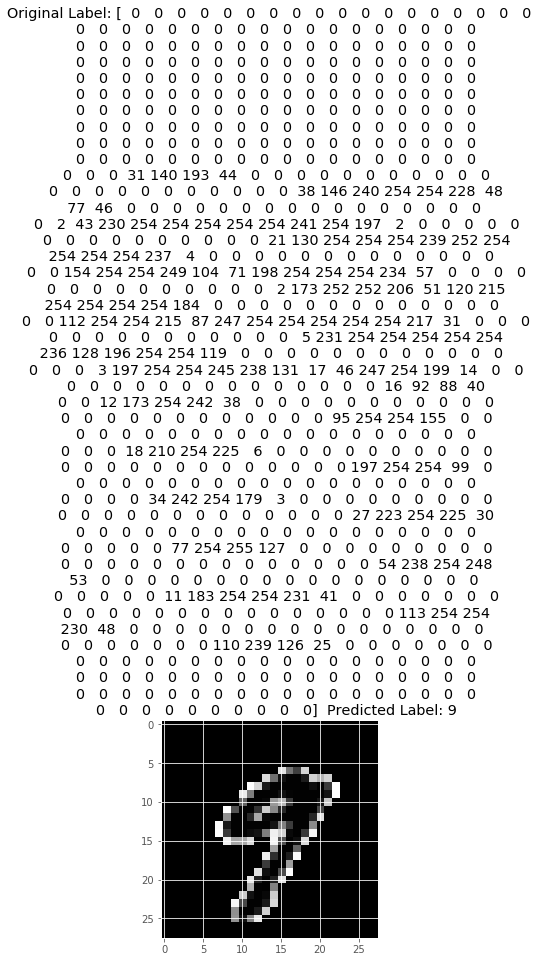

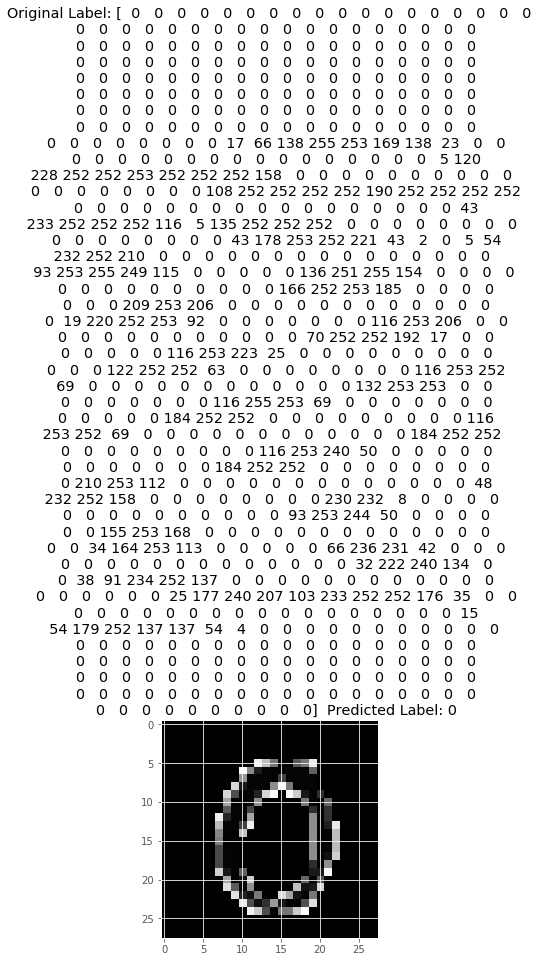

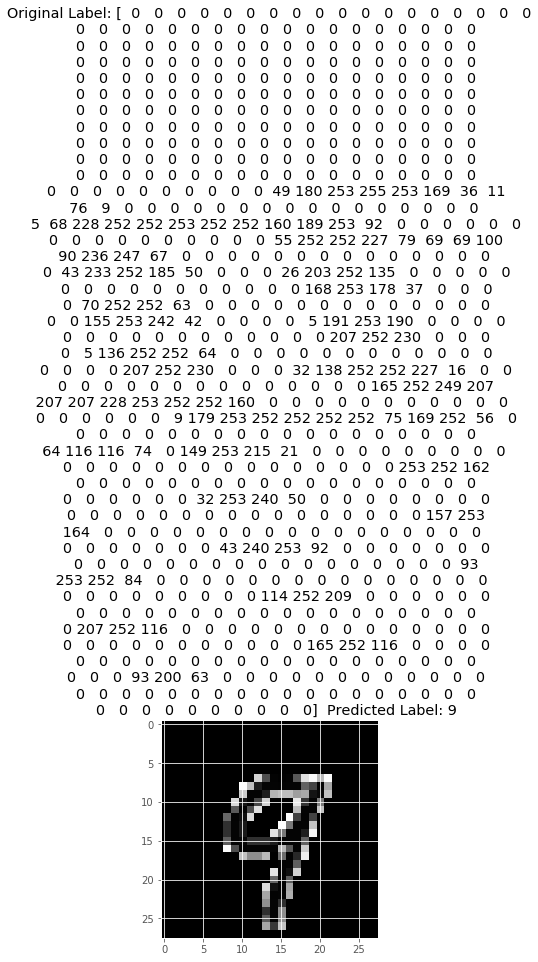

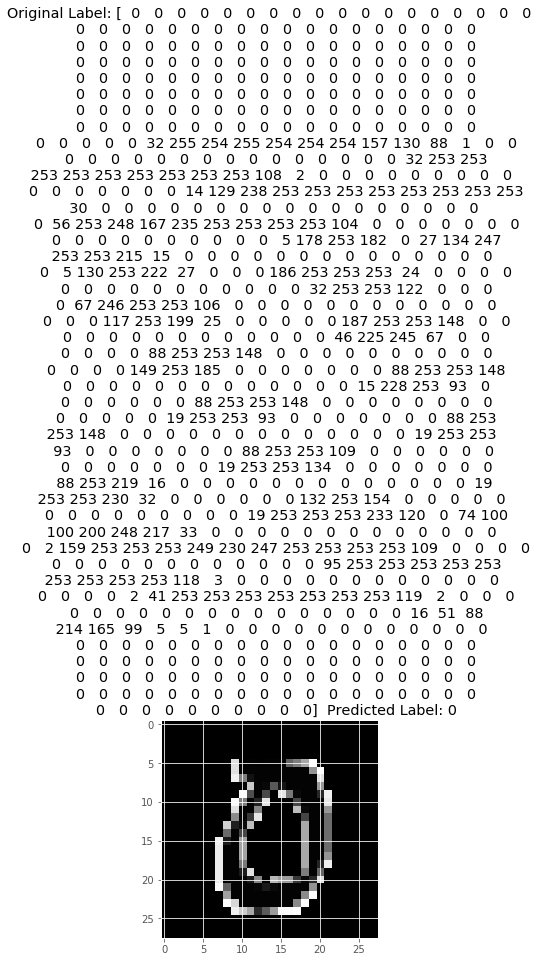

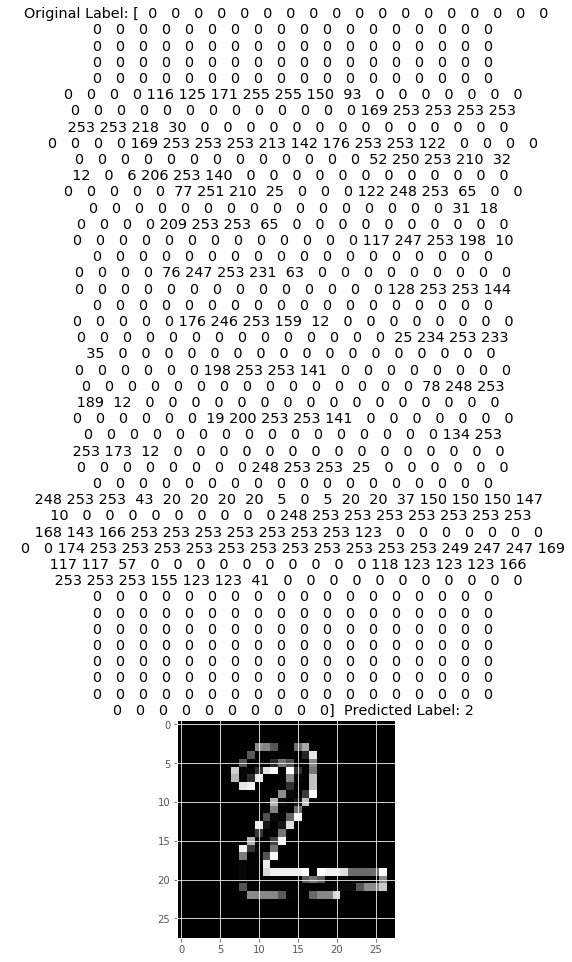

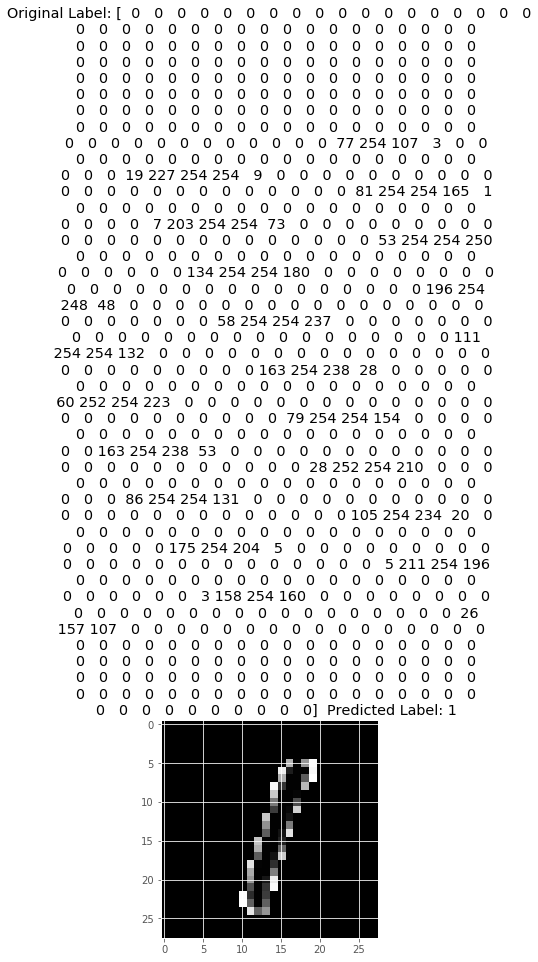

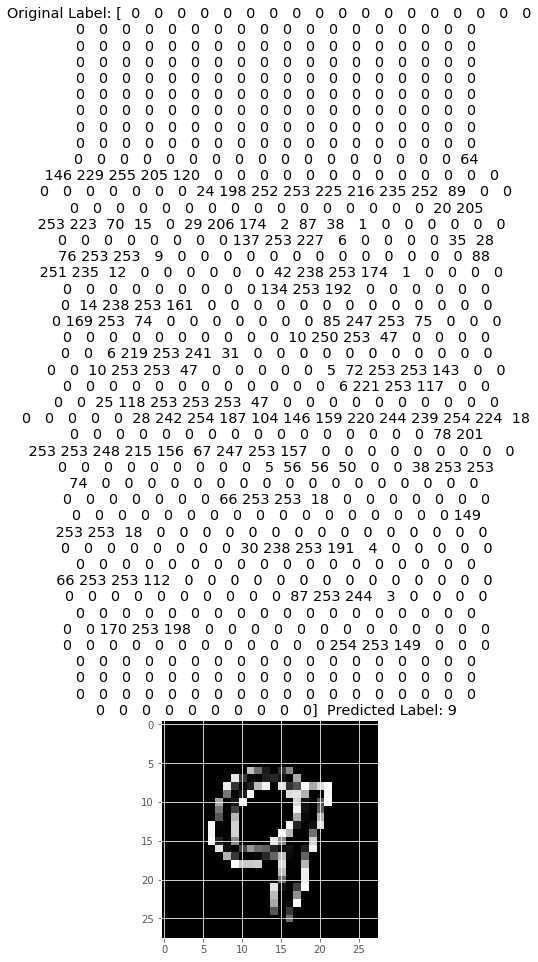

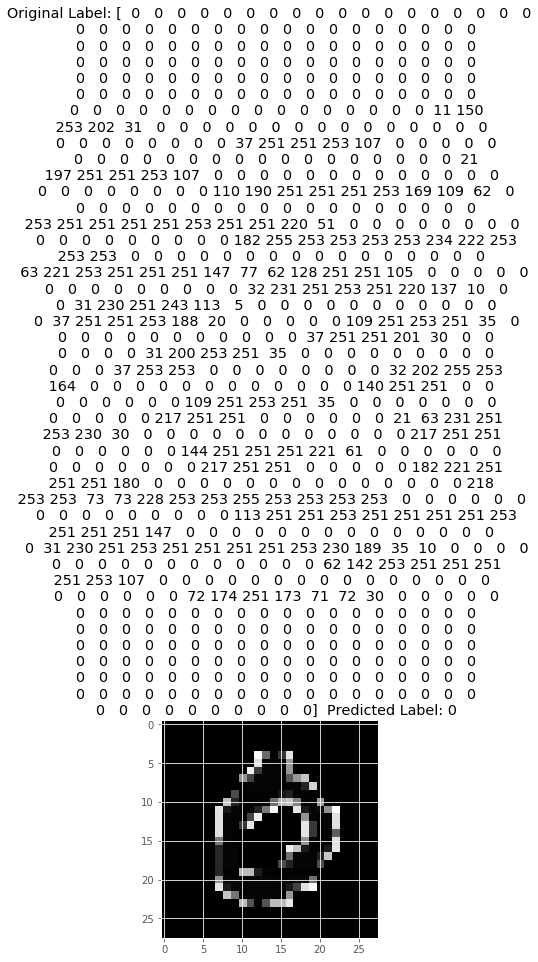

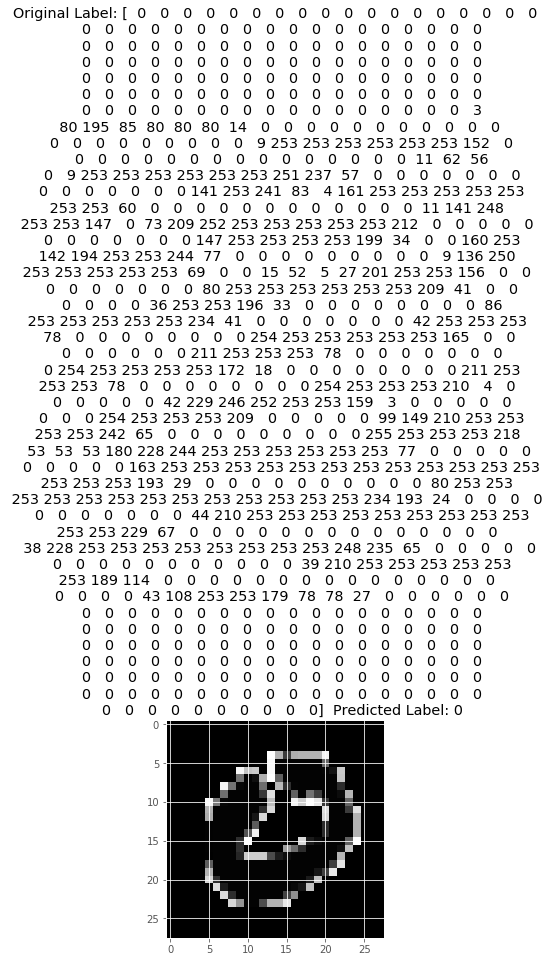

In [27]:
a = np.random.randint(1,30,10)
for i in a:
    two_d = (np.reshape(timg[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(timg[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()